# Community detection

Consider the structural heterogeniety of the networks, focusing on their community structure.

Community in the network is usually defined as a set of nodes being more strongly/densely connected internally compared to their connections to the rest of the network.

What is the connection strength and how can one measure it? Existance or the weight of edge is not sufficient as even a lower-weight edge between a pair of nodes having fewer connections overall might be relatively more important than a higher weight edge between a pair of nodes having lots of other strong connections. Imagine a case when nodes are towns and connections between the pairs of towns are measured by the number of pairs friends living in those two towns. In this case a connection of 100 friendship relations between two large cities having millions of people living there might be much less important compared to a connection of 10 friendships between a pair of small villages, having 10 housholds in each.

Compare the edge weight with the average expected one in a network having the same origin and destination node strength but randomly distributed connections, normalized by the total network weight. In case of a directed network this is:
$$
q(x,y)=\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2},
$$
where $q(x,y)$ is the relative strength score between two nodes x and y, $e(x,y)$ is the edge weight, $T$ - total network weight, $k_x^{out}=\sum_y e(x,y)$ - outgoing strength of the node $x$, $k_y^{in}=\sum_x e(x,y)$ - incoming strength of the node $y$.

Then edges with positive relative strength scores represent particularly strong network connections and are preferred by the community detection to be located inside the community, while edges with negative score are avoided (preferred to be placed between communities). Then given a certain paritioning $P=(c_x, x\in N)$ - a vector of discrete community numbers $c_x$ associated with each node $x$ of the set $N$ - one can define the overall modularity score
$$
Q(P)=\sum\limits_{x,y,\ c_x=c_y}q(x,y)=\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right],
$$
In case of an undirected network, one can treat is as directed with the same edge weights $e(x,y)=e(y,x)$ going in both directions between $x$ and $y$ and given that $k_x^{in}=k_x^{out}=k_x$, where $k_x$ is the total node strength in the original undirected network, the above equation can be written as
$$
Q(P)=\sum\limits_{x,y,\ c_x=c_y}q(x,y)=\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x k_y}{T^2}\right].
$$
where $T$ is the total weight of the network, while any edge is taken twice with the exteption of the loop edges which are taken only once.

It is easy to see that modularity score is normalized
$$
-1<Q<1
$$
as
$$
-1=-\sum\limits_{x,y}\frac{k_x^{out}k_y^{in}}{T^2}<\sum\limits_{x,y,\ c_x=c_y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right]<\sum\limits_{x,y}\frac{e(x,y)}{T}=1.
$$
Also for the trivial partitioning $P_0$ taking the entire network as one single community
$$
Q(P_0)=\sum\limits_{x,y}\left[\frac{e(x,y)}{T}-\frac{k_x^{out}k_y^{in}}{T^2}\right]=\sum\limits_{x,y}\frac{e(x,y)}{T}-\sum\limits_{x,y}\frac{k_x^{out}k_y^{in}}{T^2}=1-1=0.
$$
So a reasonable partitioning (better than a trivial one $P_0$) should have positive modularity, the higher the better (upper limit is 1, but usually it can not really be approached). Some sources refer to the networks admitting partitioning with modularity over 0.6 as highly modular, but this is rather a subjective judgement. The only universal guideline is to look for a partitioning having as high modularity score as possible and this is the objective of the entire family of modularity optimization algorithms.

There are multpiple algorithms available for modularity optimization, e.g:

* Newman’s greedy heuristic [M. E. J. Newman, Phys. Rev. E 69, 066133 (2004), URL
http://link.aps.org/doi/10.1103/PhysRevE.69.066133]

* Clauset-Newman-Moore [A. Clauset, M. Newman, and C. Moore, Phys. Rev. E70 (6), 066111 (2004)]

* Newman’s spectral method with refinement [M. Newman, Proceedings of the National Academy of Sciences 103, 8577 (2006)]

* Louvain method [V. Blondel, J. Guillaume, R. Lambiotte, and E. Lefebvre, J. Stat. Mech 10008 (2008)]

* Le-Martelot’s method [E. Le Martelot and C. Hankin, in Proceedings of the 2011 International Conference on Knowledge Discovery and Information Retrieval (KDIR 2011) (SciTePress, Paris, 2011), pp. 216–225.]

* Extremal optimization [J. Duch and A. Arenas, Phys. Rev. E 72, 027104 (2005)]

* Simulated Annealing [L. A. R. Guimer`a, M. Sales-Pardo, Phys, Rev. E70(2), 025101 (2004).
B. H. Good, Y.-A. de Montjoye, and A. Clauset, Phys. Rev. E 81, 046106 (2010)]

* COMBO [Sobolevsky, S., Campari, R., Belyi, A., & Ratti, C. (2014). General optimization technique for high-quality community detection in complex networks. Physical Review E, 90(1), 012811.]

Newman’s greedy heuristic is perhaps the simplest one, starting with all network nodes takes as separate communities and iteratively merging the pairs of nodes with the strongest connection so far until a given number of commutities is reached. It is relatively fast but not too efficient. Clauset-Newman-Moore is a further improvement of this heuristic. Louvain method is pretty fast and can efficiently hangle even large-scale networks, however the target modularity scores acheived often fall short compared to the best possible solution. Le-Martelot method is another example of a fast and relatively efficient approach.

When quality of the resulting partition is more important than speed, slower but more accurate methods could be preferred, like extremal optimization or simulated annealing. A good balance between high accuracy (often by far the best among rivals) and acceptable speed for the networks of up to 10.000-50.000 nodes is provided by our in-house algorithm COMBO.

Further we mainly rely on COMBO also comparing it with a faster Clauset-Newman-Moore heuristic.

In [1]:
#Please notice that Clauset-Newman-Moore heuristic is implemented in networkx version 2.2, while in the newest version moves it to 
#networkx.algorithms.community.modularity_max module - please feel free to try importing from it in this case
import networkx
print(networkx.__version__)

2.2


In [2]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
#import shapefile as shp
#from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import os
from networkx.algorithms import community

Populating the interactive namespace from numpy and matplotlib


In [3]:
#IMPORTANT: MAKE SURE TO USE THE FULL PATH TO YOUR FOLDER HERE!!! Otherwise combo implementation won't work
workfolder='/Users/stanislav/Desktop/CommunityDetection/'

Some auxiliary procedures

In [4]:
#remove loop edges from a network
def remove_loops(G):
    GU=G
    for n in GU.nodes():
        if GU.has_edge(n,n):
            GU.remove_edge(n,n)
    return GU  

In [5]:
#produce symmetrized undirected version of a directed network
def as_undirected(G):
    GU=nx.Graph()
    for e in G.edges(data=True):
        if GU.has_edge(e[0],e[1]):
            GU[e[0]][e[1]]['weight']=GU[e[0]][e[1]]['weight']+e[2]['weight']
        else:
            GU.add_edge(e[0],e[1],weight=e[2]['weight'])
    return GU        

In [6]:
#add unit weights to unweighted network nodes
def make_weighted(G):
    WG=G
    for e in WG.edges():
        WG[e[0]][e[1]]['weight']=1
    return WG    

# 1 Classic networks

Consider a couple of classic networks - Zachary's Karate Club, Les Miserables novel characters co-appearance and C. Elegans neural network.

In [7]:
#load the Zachary's Karate Club network
Nkarate = nx.read_gml('ClassicNet/karate.gml', label='id')
Nkarate = make_weighted(Nkarate)

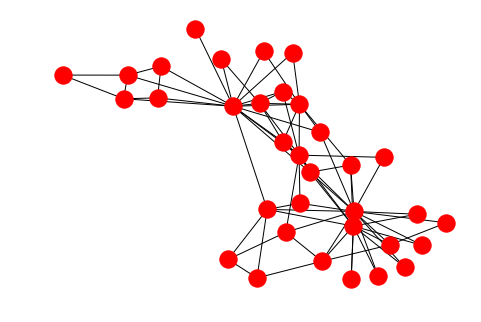

In [8]:
random.seed(2015)
nx.draw(Nkarate,pos=None)

In [9]:
def modularity(G,partition):
    #compute network modularity according to the given partitioning
    nodes=list(G.nodes())
    #compute node weights and total network weight
    if G.is_directed():
        w1=G.out_degree(weight='weight')
        w2=G.in_degree(weight='weight')
        T=1.0*sum([e[2]['weight'] for e in G.edges(data=True)])
    else:
        w1=G.degree(weight='weight')
        w2=G.degree(weight='weight')
        T=1.0*sum([(1+(e[0]!=e[1]))*e[2]['weight'] for e in G.edges(data=True)])
    M=0 #start accumulating modularity score
    for a in nodes:
        for b in nodes:
            #if (G.is_directed())|(b>=a):
                if partition[a]==partition[b]: #if nodes belong to the same community
                    #get edge weight
                    if G.has_edge(a,b):
                        e=G[a][b]['weight']
                    else:
                        e=0
                    M+=e/T-w1[a]*w2[b]/(T**2) #add modularity score for the considered edge 
    return M                

In [10]:
def sets2dictPartition(spart):
    part={}
    c=1
    for cset in spart:
        cpart={n:c for n in cset}
        part.update(cpart)
        c+=1
    return part    

In [11]:
#Please notice that Clauset-Newman-Moore heuristic is implemented in networkx version 2.2, while in the newest version moves it to 
#networkx.algorithms.community.modularity_max module - please feel free to try importing from it in this case or google the solution for your specific version of networkx. Also feel free to try other algorithms it provides

#partition Karate Club network using Louvain method
PLKarate=community.greedy_modularity_communities(Nkarate)

In [12]:
#original format of the partitioning is a list of sets
PLKarate

[frozenset({9,
            15,
            16,
            19,
            21,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34}),
 frozenset({2, 3, 4, 8, 10, 13, 14, 18, 22}),
 frozenset({1, 5, 6, 7, 11, 12, 17, 20})]

In [13]:
#convert it to a dictionary
PLKarate=sets2dictPartition(PLKarate); PLKarate

{1: 3,
 2: 2,
 3: 2,
 4: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 2,
 9: 1,
 10: 2,
 11: 3,
 12: 3,
 13: 2,
 14: 2,
 15: 1,
 16: 1,
 17: 3,
 18: 2,
 19: 1,
 20: 3,
 21: 1,
 22: 2,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1}

In [14]:
print('Karate Club Louvain partitioning modularity={0}'.format(modularity(Nkarate,PLKarate)))

Karate Club Louvain partitioning modularity=0.38067061144


In [15]:
#interface for running compiled combo over the network G given a maximal number of communities maxcom
## MAKE SURE TO HAVE THE FULL PATH specified for the workfolder
##ALSO THIS MIGHT NOT WORK ON ADRF, so running on a local installation is suggested
def getComboPartition(G,maxcom):
    #save network in net format
    nodes={}
    nodenum={}
    i=0
    #create a dictionary transforming nodes to unique numbers
    for n in list(G.nodes()):
        nodenum[n]=i
        nodes[i]=n
        i+=1
    f = open('combo/temp.net', 'w')
    f.write('*Arcs\n')
    for e in G.edges(data=True):
        f.write('{0} {1} {2}\n'.format(nodenum[e[0]],nodenum[e[1]],e[2]['weight']))
    f.close()
    #run combo
    command=workfolder+'/combo/comboCPP combo/temp.net'
    if maxcom<Inf:
        command=command+' {0}'.format(maxcom)  
    os.system(command)
    #read resulting partition
    f = open('combo/temp_comm_comboC++.txt', 'r')
    i=0
    partition={}
    for line in f:
        partition[nodes[i]]=int(line)
        i+=1
    return partition    

In [16]:
PCKarate=getComboPartition(Nkarate,Inf)

In [17]:
print('Karate Club partitioning Modularity={0}'.format(modularity(Nkarate,PCKarate)))

Karate Club partitioning Modularity=0.419789612097


In [18]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

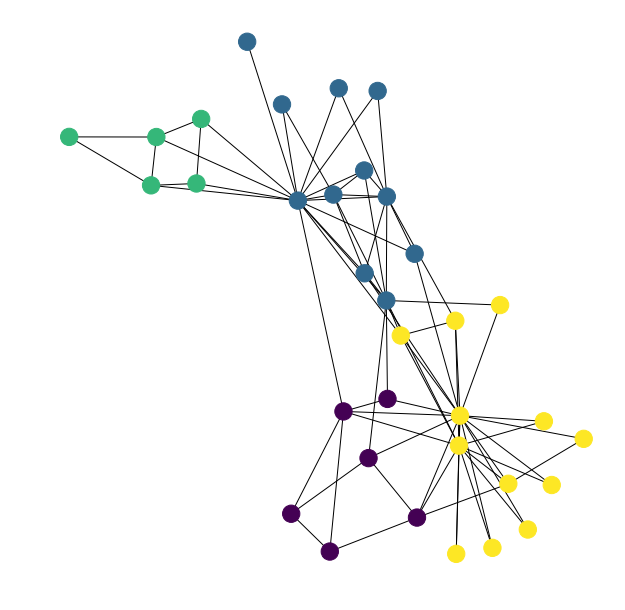

In [19]:
random.seed(2015)
visualizePartition(Nkarate,PCKarate,None)

In [20]:
PCKarate2=getComboPartition(Nkarate,2)
print('Karate Club bi-partitioning Modularity={0}'.format(modularity(Nkarate,PCKarate2)))

Karate Club bi-partitioning Modularity=0.371794871795


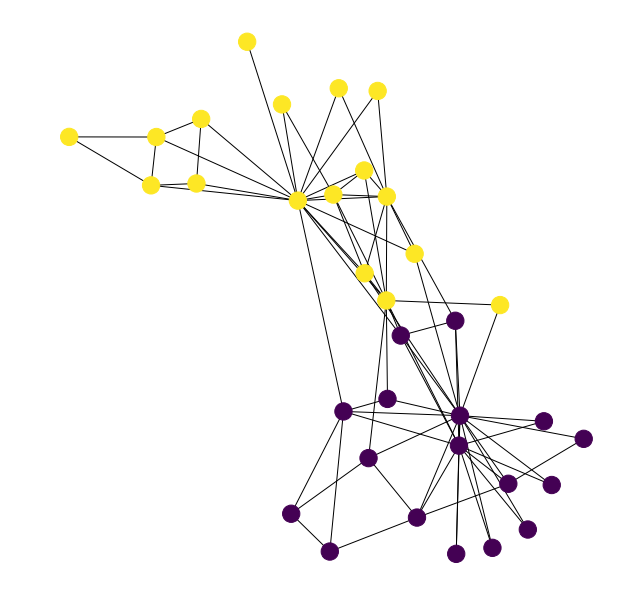

In [21]:
random.seed(2015)
visualizePartition(Nkarate,PCKarate2,None)

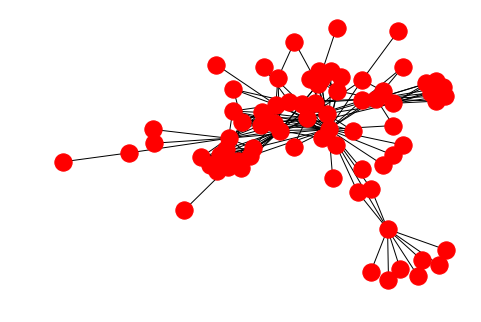

In [22]:
#load the Les Miserables Network
Nlesmis = nx.read_gml('ClassicNet/lesmis.gml')
Nlesmis = make_weighted(Nlesmis)
random.seed(2015)
nx.draw(Nlesmis,pos=None)

In [23]:
#partition Les Miserables network using Combo method
PClesmis=getComboPartition(Nlesmis,Inf)
print('Les Miserables Combo partitioning modularity={0}'.format(modularity(Nlesmis,PClesmis)))

Les Miserables Combo partitioning modularity=0.556195362391


In [24]:
#partition Les Miserables network using greedy heuristic
PLlesmis=sets2dictPartition(community.greedy_modularity_communities(Nlesmis))
print('Les Miserables Louvain partitioning modularity={0}'.format(modularity(Nlesmis,PLlesmis)))

Les Miserables Louvain partitioning modularity=0.500596751194


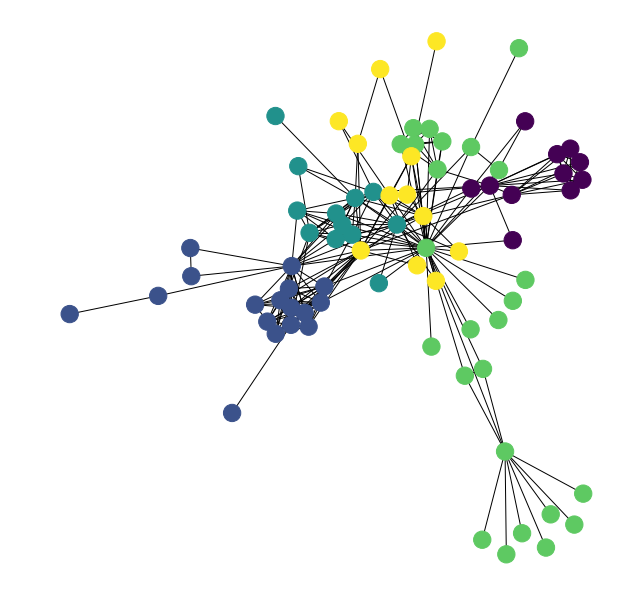

In [25]:
random.seed(2015)
visualizePartition(Nlesmis,PClesmis,None)

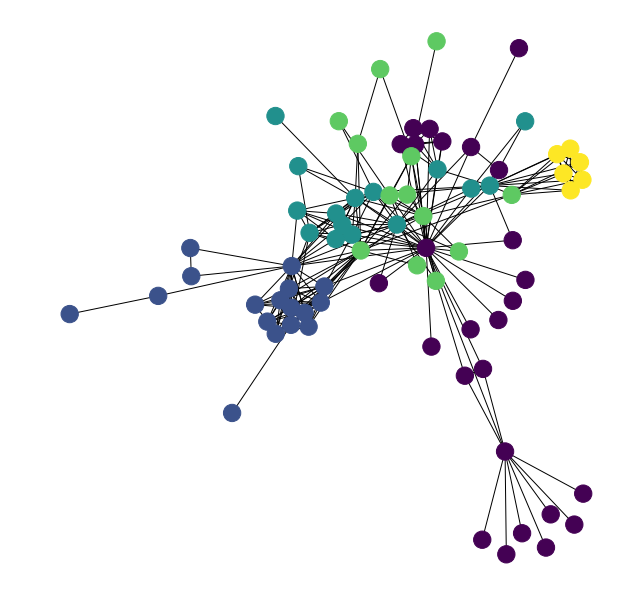

In [26]:
random.seed(2015)
visualizePartition(Nlesmis,PLlesmis,None)

In [27]:
#load the C'elegans metabolic network
Ncelegans = nx.read_gml('ClassicNet/celegansneural.gml',label='id')
#Ncelegans = make_weighted(Ncelegans)

In [28]:
NCelegans=nx.DiGraph()
for e in Ncelegans.edges(data=True):
    NCelegans.add_edge(e[0],e[1],weight=e[2]['value'])

In [29]:
#partition C'elegans network using Combo method
PCCelegans=getComboPartition(NCelegans,Inf)
print('C\'Elegans Combo partitioning modularity={0}'.format(modularity(NCelegans,PCCelegans)))

C'Elegans Combo partitioning modularity=0.508343134437


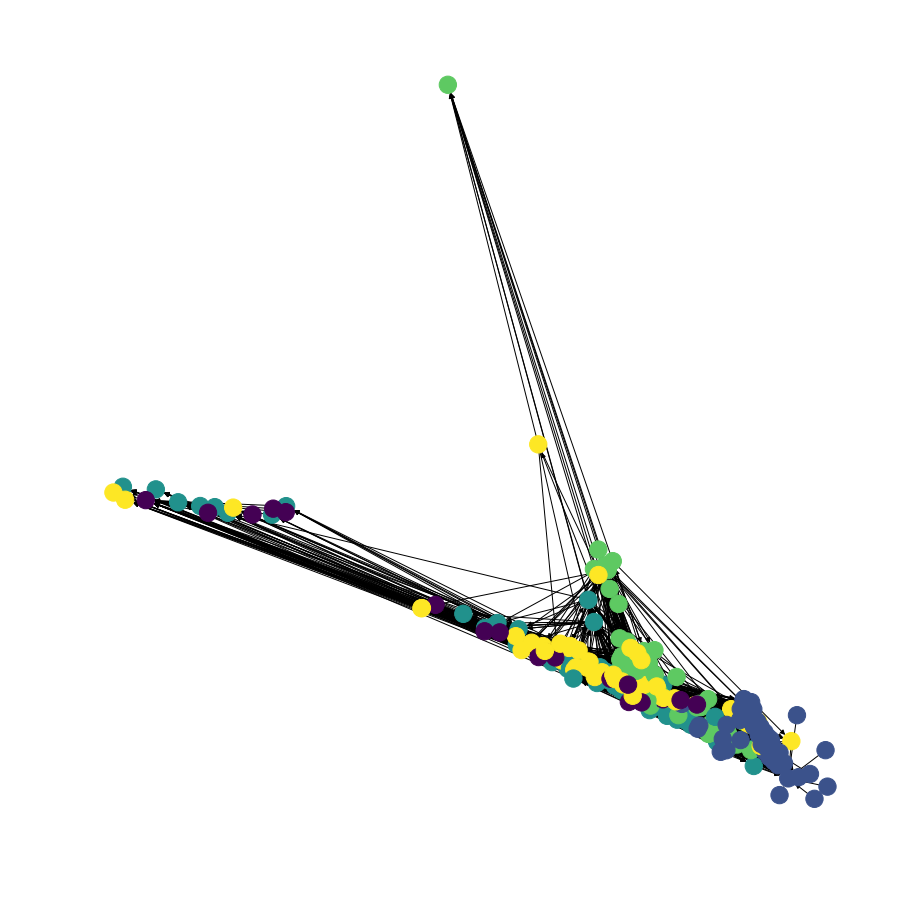

In [30]:
random.seed(2015)
visualizePartition(NCelegans,PCCelegans,None)

# 2 Migration network

In [31]:
# load state total population data (states numbered in the same order)
USmigration=pd.read_csv( workfolder+'RNetData/USstates_migration.csv' , header=0 )
USmigration.head()

,i,j,a
0,1,1,588293
1,2,1,93
2,3,1,833
3,4,1,691
4,5,1,2087


In [32]:
#creating a directed weighted graph of US migration adding all the edges
USmig=nx.DiGraph()
nx.set_edge_attributes(USmig,'weight', 0)
for k in USmigration.index:
    USmig.add_edge(USmigration.i[k]-1,USmigration.j[k]-1,weight=USmigration.a[k])

In [33]:
import geopandas as gpd

In [34]:
#load the collection of shapes for US states from the shapefile
#as we'll see below shapes can be thought as a closed sequence of points in space
USsf = gpd.read_file(workfolder+'USA_adm/USA_states_reduced.shp')

In [35]:
USsf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,ENGTYPE_1,VALIDFR_1,VALIDTO_1,REMARKS_1,Shape_Leng,Shape_Area,geometry
0,234,USA,United States,3191,Alabama,AL|Ala.,None,US.AL,None,State,State,18170815,Present,None,21.487730,12.867000,POLYGON ((-88.18225199999989 35.00870800000007...
1,234,USA,United States,3192,Alaska,AK|Alaska,None,US.AK,None,State,State,18671011,Present,None,802.655976,281.241874,"POLYGON ((-156.03772 70.83242000000007, -155.9..."
2,234,USA,United States,3193,Arizona,AZ|Ariz.,None,US.AZ,None,State,State,18670118,Present,None,23.752834,28.931416,POLYGON ((-110.5392979999999 37.00423000000006...
3,234,USA,United States,3194,Arkansas,AR|Ark.,None,US.AR,None,State,State,18360615,Present,None,21.570449,13.581243,POLYGON ((-93.36902699999996 36.49686000000003...
4,234,USA,United States,3195,California,CA|Calif.,None,US.CA,None,State,State,18500909,Present,None,56.411212,41.647428,POLYGON ((-121.8726259999999 42.00301100000001...


In [36]:
#now perform partitioning based on the original network (with directions and loops) using Combo
PCUSmig = getComboPartition(USmig,4)
modularity(USmig,PCUSmig)

0.6654801092286532

In [37]:
def visualizePartitionShape(gdf,Y,idfield): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize shapes using communities for picking colors        
    colors=['green','blue','red','yellow','magenta']
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(max(Y.values())+1): #for each cluster
        if idfield=='index':
            ID=gdf.index
        else:
            ID=gdf[idfield]
        gdf.loc[ID.map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

/anaconda2/lib/python2.7/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


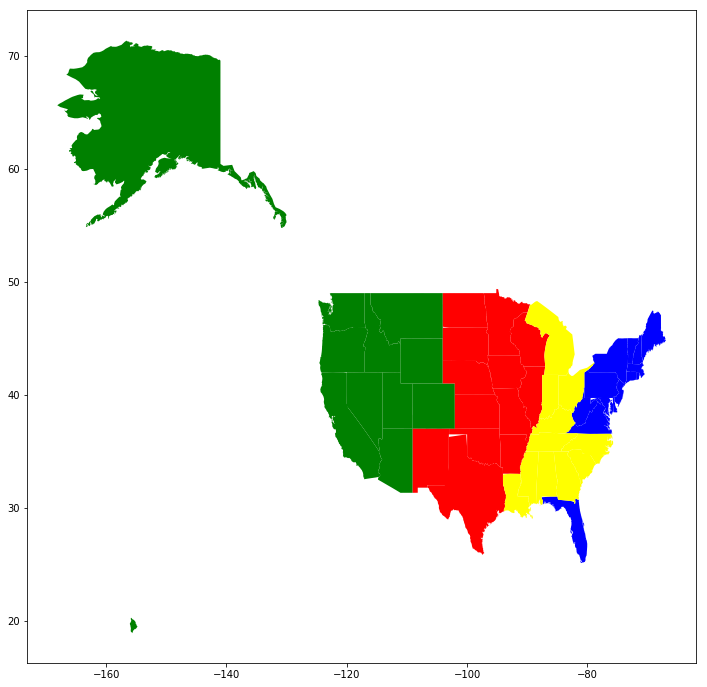

In [38]:
visualizePartitionShape(USsf,PCUSmig,'index')

## 3 NYC Taxi network

In [39]:
taxi = pd.read_csv(workfolder+'RNetData/NYCnet.csv',header=-1)

In [40]:
NYCtaxi=nx.DiGraph()
nx.set_edge_attributes(NYCtaxi,'weight', 0)
for k in taxi.index:
    NYCtaxi.add_edge(taxi[0][k]-1,taxi[1][k]-1,weight=taxi[2][k])

In [41]:
NYCsf = gpd.read_file(workfolder+'taxi_zones/taxi_zones.shp')

### Excercise 1

In [42]:
#partition the network using combo
PCtaxi = getComboPartition(NYCtaxi,Inf)
modularity(NYCtaxi,PCtaxi)

0.30545219629471343

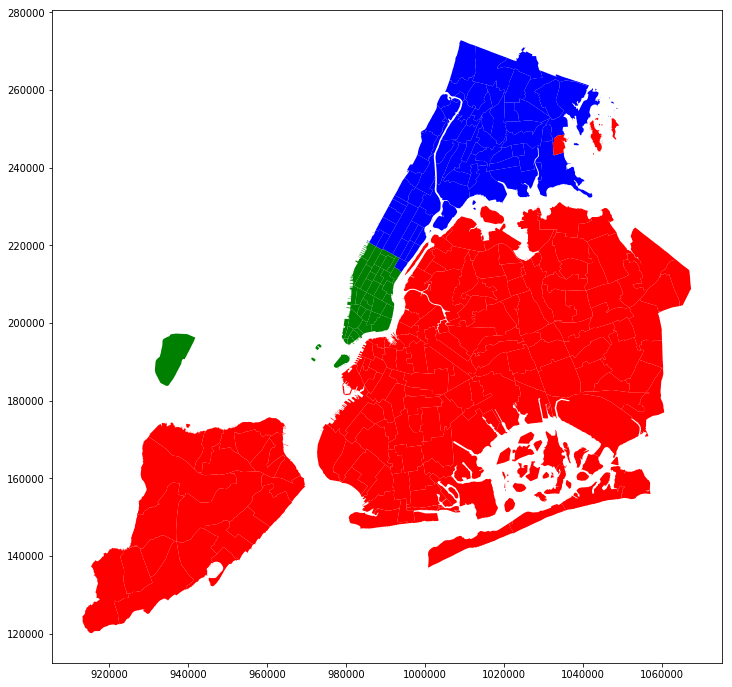

In [43]:
visualizePartitionShape(NYCsf,PCtaxi,'index')

## Taipei subway network

In [44]:
TaipeiNet=pd.read_csv(workfolder+'RNetData/TaipeiNet.csv',header=-1);

In [45]:
TaipeiSubway=nx.DiGraph()
nx.set_edge_attributes(TaipeiSubway,'weight', 0)
for k in TaipeiNet.index:
    TaipeiSubway.add_edge(TaipeiNet[0][k]-1,TaipeiNet[1][k]-1,weight=TaipeiNet[2][k])

In [46]:
Stations=pd.read_csv(workfolder+'RNetData/TPE_masternodes.csv',header=0)
Stations.head()

,stop_name,master_node_id,stop_id,stop_lat,stop_lon
0,Dingpu,Dingpu_0,BL01,24.959300,121.419900
1,Yongning,Yongning_0,BL02,24.967221,121.436827
2,Tucheng,Tucheng_0,BL03,24.973226,121.444452
3,Haishan,Haishan_0,BL04,24.985548,121.448875
4,Far Eastern Hospital,Far Eastern Hospital_0,BL05,24.998589,121.452649


In [47]:
StationPos={i:(Stations.stop_lon[i],Stations.stop_lat[i]) for i in Stations.index}

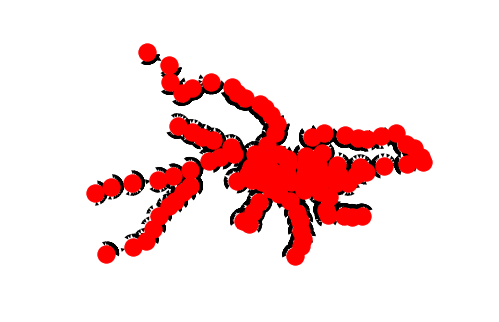

In [48]:
nx.draw(TaipeiSubway,width=0,pos=StationPos)

In [49]:
PCsubway = getComboPartition(TaipeiSubway,Inf)
modularity(TaipeiSubway,PCsubway)

0.1843677518606017

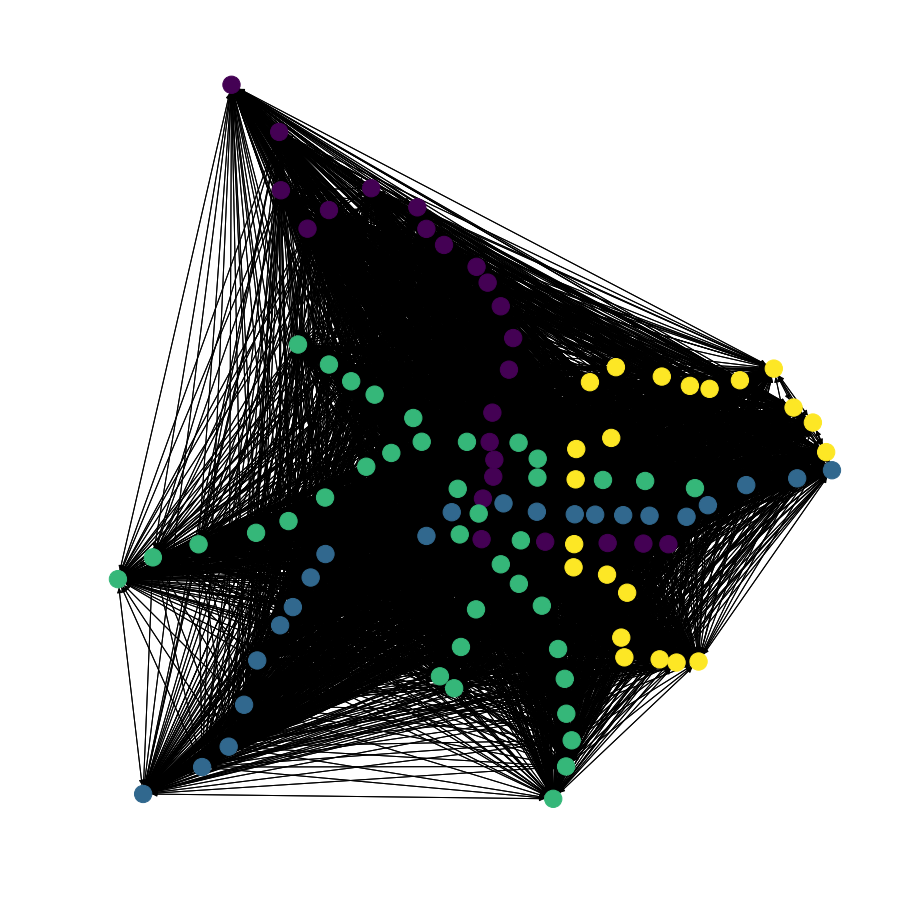

In [50]:
visualizePartition(TaipeiSubway,PCsubway,StationPos)

# Task 1. 
Partition and visualize the world airflights network from previous labs

# Task 2.
Partition and visualize taxi network of weekend ridership